In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from electrostatic import compute_electrostatic_interactions
from graphormer import compute_graphormer_distances
from commute import compute_commute_distances

from positional_encoding import nodepair_to_edge, nodepair_to_node

In [2]:
# Test graphs
adj_dict = {}

# 6-ring
adj = np.asarray([[0, 1, 0, 0, 0, 1],
                [1, 0, 1, 0, 0, 0],
                [0, 1, 0, 1, 0, 0],
                [0, 0, 1, 0, 1, 0],
                [0, 0, 0, 1, 0, 1],
                [1, 0, 0, 0, 1, 0]])
adj_dict['6-ring'] = adj

# 5-path
G = nx.path_graph(5)
adj = nx.to_numpy_array(G)
adj_dict['5-path'] = adj

# 4-clique
adj = 1 - np.eye(4)
adj_dict['4-clique'] = adj

# 4-barbell
H = nx.barbell_graph(4, 0)
adj = nx.to_numpy_array(H)
adj_dict['4-barbell'] = adj

4-barbell graph


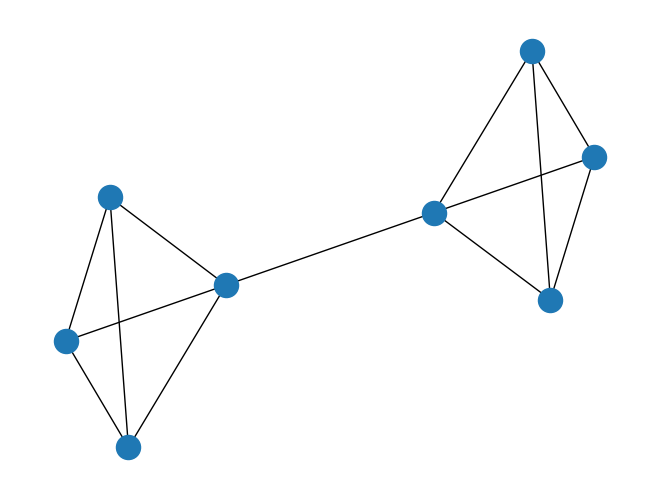

In [3]:
print("4-barbell graph")
nx.draw(H)


### Test new positional encodings

In [4]:
# Test electrostatic interaction
for graph_type, adj in adj_dict.items():
    print("Graph type:", graph_type)
    print(compute_electrostatic_interactions(adj, cache={})[0].round(2))

Graph type: 6-ring
[[ 0.   -0.42 -0.67 -0.75 -0.67 -0.42]
 [-0.42  0.   -0.42 -0.67 -0.75 -0.67]
 [-0.67 -0.42  0.   -0.42 -0.67 -0.75]
 [-0.75 -0.67 -0.42  0.   -0.42 -0.67]
 [-0.67 -0.75 -0.67 -0.42  0.   -0.42]
 [-0.42 -0.67 -0.75 -0.67 -0.42  0.  ]]
Graph type: 5-path
[[ 0.  -0.2 -0.6 -1.2 -2. ]
 [-0.8  0.  -0.4 -1.  -1.8]
 [-1.4 -0.6  0.  -0.6 -1.4]
 [-1.8 -1.  -0.4  0.  -0.8]
 [-2.  -1.2 -0.6 -0.2  0. ]]
Graph type: 4-clique
[[ 0.   -0.25 -0.25 -0.25]
 [-0.25  0.   -0.25 -0.25]
 [-0.25 -0.25  0.   -0.25]
 [-0.25 -0.25 -0.25  0.  ]]
Graph type: 4-barbell
[[ 0.   -0.25 -0.25 -0.12 -0.62 -1.   -1.   -1.  ]
 [-0.25  0.   -0.25 -0.12 -0.62 -1.   -1.   -1.  ]
 [-0.25 -0.25  0.   -0.12 -0.62 -1.   -1.   -1.  ]
 [-0.38 -0.38 -0.38  0.   -0.5  -0.87 -0.87 -0.87]
 [-0.88 -0.88 -0.87 -0.5   0.   -0.38 -0.37 -0.37]
 [-1.   -1.   -1.   -0.63 -0.12  0.   -0.25 -0.25]
 [-1.   -1.   -1.   -0.63 -0.13 -0.25  0.   -0.25]
 [-1.   -1.   -1.   -0.63 -0.12 -0.25 -0.25  0.  ]]


In [5]:
# Test graphormer distance
for graph_type, adj in adj_dict.items():
    print("Graph type:", graph_type)
    print(compute_graphormer_distances(adj, adj.shape[0], cache={})[0])

Graph type: 6-ring
[[0 1 2 3 2 1]
 [1 0 1 2 3 2]
 [2 1 0 1 2 3]
 [3 2 1 0 1 2]
 [2 3 2 1 0 1]
 [1 2 3 2 1 0]]
Graph type: 5-path
[[0 1 2 3 4]
 [1 0 1 2 3]
 [2 1 0 1 2]
 [3 2 1 0 1]
 [4 3 2 1 0]]
Graph type: 4-clique
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
Graph type: 4-barbell
[[0 1 1 1 2 3 3 3]
 [1 0 1 1 2 3 3 3]
 [1 1 0 1 2 3 3 3]
 [1 1 1 0 1 2 2 2]
 [2 2 2 1 0 1 1 1]
 [3 3 3 2 1 0 1 1]
 [3 3 3 2 1 1 0 1]
 [3 3 3 2 1 1 1 0]]


In [6]:
# Test commute distance
for graph_type, adj in adj_dict.items():
    print("Graph type:", graph_type)
    print(compute_commute_distances(adj, adj.shape[0], cache={})[0])

Graph type: 6-ring
[[ 0. 10. 16. 18. 16. 10.]
 [10.  0. 10. 16. 18. 16.]
 [16. 10.  0. 10. 16. 18.]
 [18. 16. 10.  0. 10. 16.]
 [16. 18. 16. 10.  0. 10.]
 [10. 16. 18. 16. 10.  0.]]
Graph type: 5-path
[[ 0.  8. 16. 24. 32.]
 [ 8.  0.  8. 16. 24.]
 [16.  8.  0.  8. 16.]
 [24. 16.  8.  0.  8.]
 [32. 24. 16.  8.  0.]]
Graph type: 4-clique
[[0. 6. 6. 6.]
 [6. 0. 6. 6.]
 [6. 6. 0. 6.]
 [6. 6. 6. 0.]]
Graph type: 4-barbell
[[ 0. 13. 13. 13. 39. 52. 52. 52.]
 [13.  0. 13. 13. 39. 52. 52. 52.]
 [13. 13.  0. 13. 39. 52. 52. 52.]
 [13. 13. 13.  0. 26. 39. 39. 39.]
 [39. 39. 39. 26.  0. 13. 13. 13.]
 [52. 52. 52. 39. 13.  0. 13. 13.]
 [52. 52. 52. 39. 13. 13.  0. 13.]
 [52. 52. 52. 39. 13. 13. 13.  0.]]


### Test conversion functions

In [7]:
# nodepair -> edge
for graph_type, adj in adj_dict.items():
    pe, base_level, _ = compute_electrostatic_interactions(adj, cache={})

    # Convert to edge level
    pos_level = 'edge'
    print("Graph type:", graph_type, f"({base_level} -> {pos_level})")
    print(nodepair_to_edge(pe, adj))

Graph type: 6-ring (pair -> edge)
tensor([-0.4167, -0.4167, -0.4167, -0.4167, -0.4167, -0.4167, -0.4167, -0.4167,
        -0.4167, -0.4167, -0.4167, -0.4167], dtype=torch.float64)
Graph type: 5-path (pair -> edge)
tensor([-0.2000, -0.8000, -0.4000, -0.6000, -0.6000, -0.4000, -0.8000, -0.2000],
       dtype=torch.float64)
Graph type: 4-clique (pair -> edge)
tensor([-0.2500, -0.2500, -0.2500, -0.2500, -0.2500, -0.2500, -0.2500, -0.2500,
        -0.2500, -0.2500, -0.2500, -0.2500], dtype=torch.float64)
Graph type: 4-barbell (pair -> edge)
tensor([-0.2500, -0.2500, -0.1250, -0.2500, -0.2500, -0.1250, -0.2500, -0.2500,
        -0.1250, -0.3750, -0.3750, -0.3750, -0.5000, -0.5000, -0.3750, -0.3750,
        -0.3750, -0.1250, -0.2500, -0.2500, -0.1250, -0.2500, -0.2500, -0.1250,
        -0.2500, -0.2500], dtype=torch.float64)


In [8]:
# nodepair -> node
for graph_type, adj in adj_dict.items():
    pe, base_level, _ = compute_electrostatic_interactions(adj, cache={})

    # Convert to node level
    pos_level = 'node'
    print("Graph type:", graph_type, f"({base_level} -> {pos_level})")
    print(nodepair_to_node(pe, stats_list=[np.min, np.mean, np.std]))

Graph type: 6-ring (pair -> node)
[[-0.75       -0.75       -0.48611111 -0.48611111  0.25192163  0.25192163]
 [-0.75       -0.75       -0.48611111 -0.48611111  0.25192163  0.25192163]
 [-0.75       -0.75       -0.48611111 -0.48611111  0.25192163  0.25192163]
 [-0.75       -0.75       -0.48611111 -0.48611111  0.25192163  0.25192163]
 [-0.75       -0.75       -0.48611111 -0.48611111  0.25192163  0.25192163]
 [-0.75       -0.75       -0.48611111 -0.48611111  0.25192163  0.25192163]]
Graph type: 5-path (pair -> node)
[[-2.         -2.         -1.2        -0.8         0.72663608  0.72663608]
 [-1.2        -1.8        -0.6        -0.8         0.45607017  0.60663004]
 [-0.6        -1.4        -0.4        -0.8         0.21908902  0.53665631]
 [-1.2        -1.8        -0.6        -0.8         0.45607017  0.60663004]
 [-2.         -2.         -1.2        -0.8         0.72663608  0.72663608]]
Graph type: 4-clique (pair -> node)
[[-0.25       -0.25       -0.1875     -0.1875      0.10825318  0.1082